In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('updated_data/anova_correlation_train.csv')
test_df = pd.read_csv('updated_data/anova_correlation_test.csv')

train_df1 = pd.read_csv('updated_data/correlation_train.csv')
test_df1 = pd.read_csv('updated_data/correlation_test.csv')

train_df2 = pd.read_csv('updated_data/rfe_lasso_train.csv')
test_df2 = pd.read_csv('updated_data/rfe_lasso_test.csv')

X_train = train_df.drop('charges', axis=1)
y_train = train_df['charges']

X_test = test_df.drop('charges', axis=1)
y_test = test_df['charges']

X_train1 = train_df1.drop('charges', axis=1)
y_train1 = train_df1['charges']

X_test1 = test_df1.drop('charges', axis=1)
y_test1 = test_df1['charges']

X_train2 = train_df2.drop('charges', axis=1)
y_train2 = train_df2['charges']

X_test2 = test_df2.drop('charges', axis=1)
y_test2 = test_df2['charges']


Anova
Eğitim Verileri - R-squared: 0.7467011616061625
Eğitim Verileri - Mean Absolute Error: 4124.018084724272
Eğitim Verileri - Root Mean Squared Error: 5905.388226313016
Test Verileri - R-squared: 0.7787373616773112
Test Verileri - Mean Absolute Error: 3969.0341267772083
Test Verileri - Root Mean Squared Error: 5517.616471484386


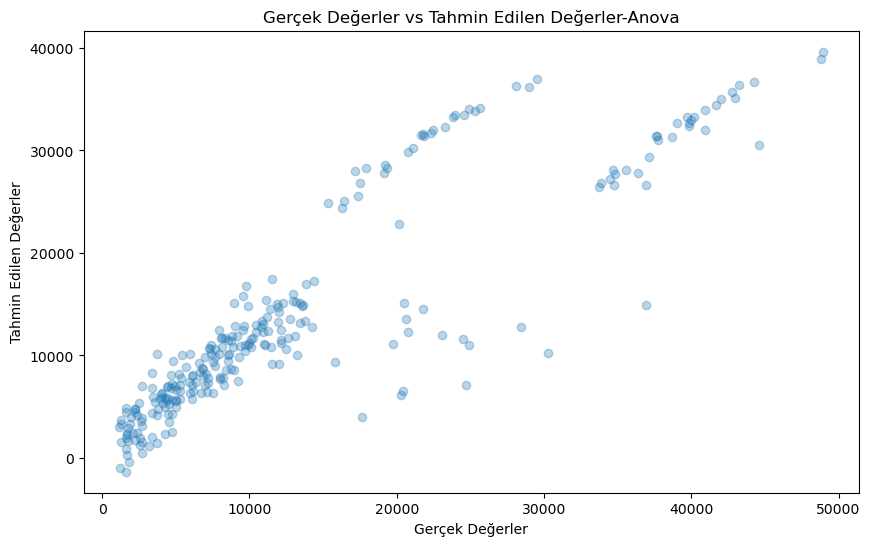

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


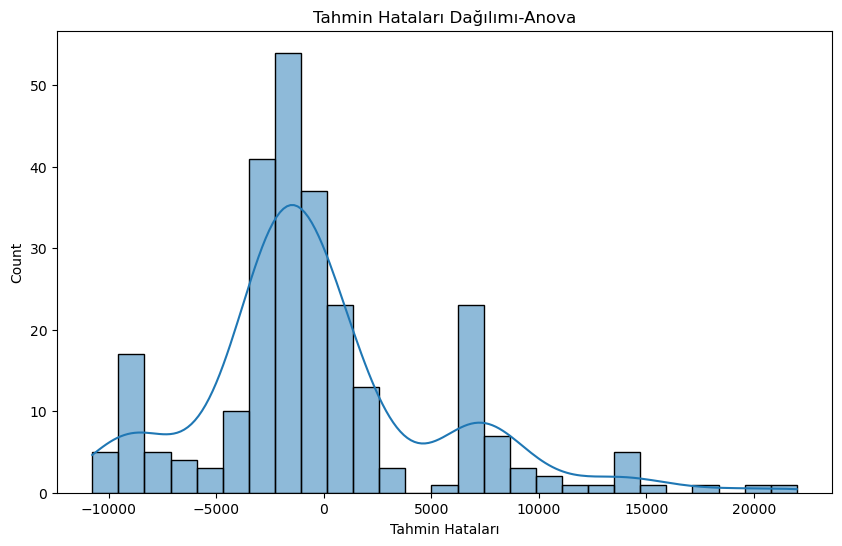

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred = model.predict(X_train)

# Test verileri üzerinde tahmin yapın
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print('Anova')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')


# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Anova')
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Anova')
plt.show()

Corelation
Eğitim Verileri - R-squared: 0.7451264800478122
Eğitim Verileri - Mean Absolute Error: 4138.1522640825515
Eğitim Verileri - Root Mean Squared Error: 5923.715784223193
Test Verileri - R-squared: 0.7796626379036238
Test Verileri - Mean Absolute Error: 3947.779753651584
Test Verileri - Root Mean Squared Error: 5506.067599221798


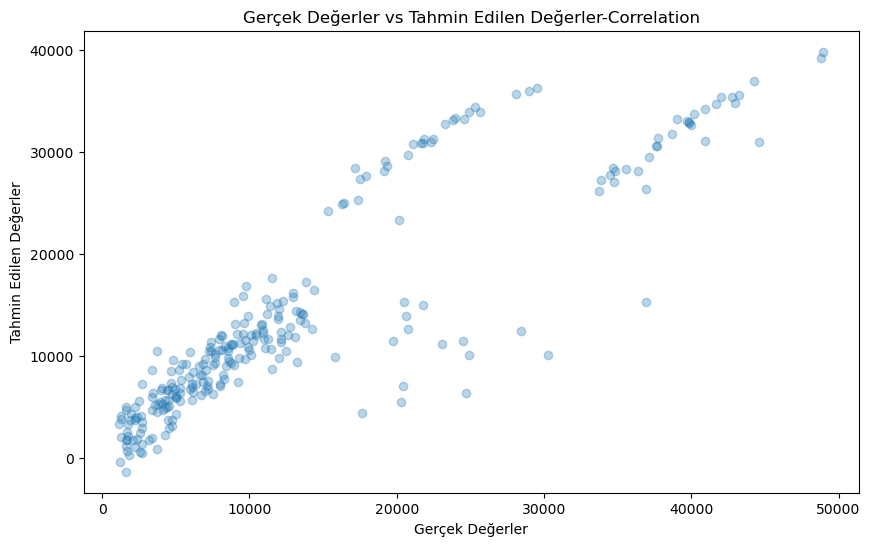

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


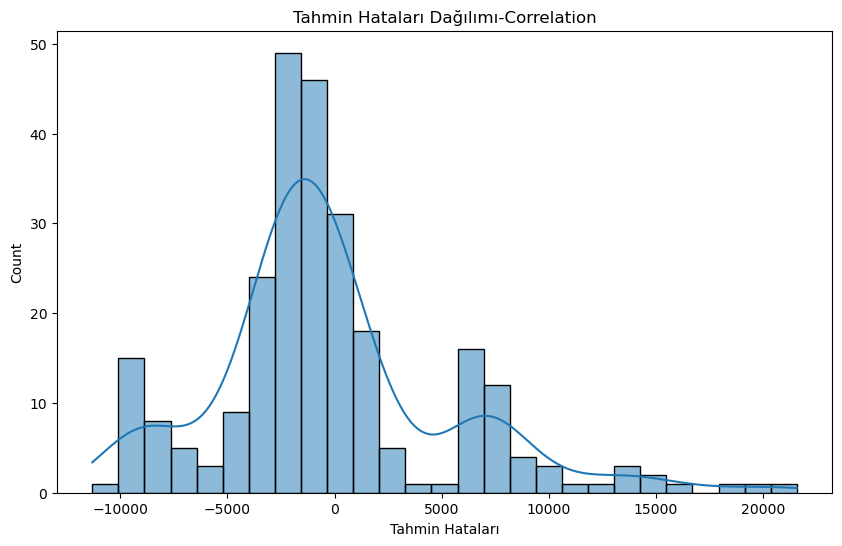

In [4]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred1 = model1.predict(X_train1)

# Test verileri üzerinde tahmin yapın
y_test_pred1 = model1.predict(X_test1)

train_mse = mean_squared_error(y_train1, y_train_pred1)
train_r2 = r2_score(y_train1, y_train_pred1)
train_mae = mean_absolute_error(y_train1, y_train_pred1)
train_rmse = np.sqrt(train_mse)

print('Corelation')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test1, y_test_pred1)
test_r2 = r2_score(y_test1, y_test_pred1)
test_mae = mean_absolute_error(y_test1, y_test_pred1)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_test_pred1, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Correlation')
plt.show()

residuals = y_test1 - y_test_pred1
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Correlation')
plt.show()

RFE
Eğitim Verileri - R-squared: 0.7462256331056831
Eğitim Verileri - Mean Absolute Error: 4122.238596086075
Eğitim Verileri - Root Mean Squared Error: 5910.928843243752
Test Verileri - R-squared: 0.7792840040783686
Test Verileri - Mean Absolute Error: 3960.902227943942
Test Verileri - Root Mean Squared Error: 5510.796458069657


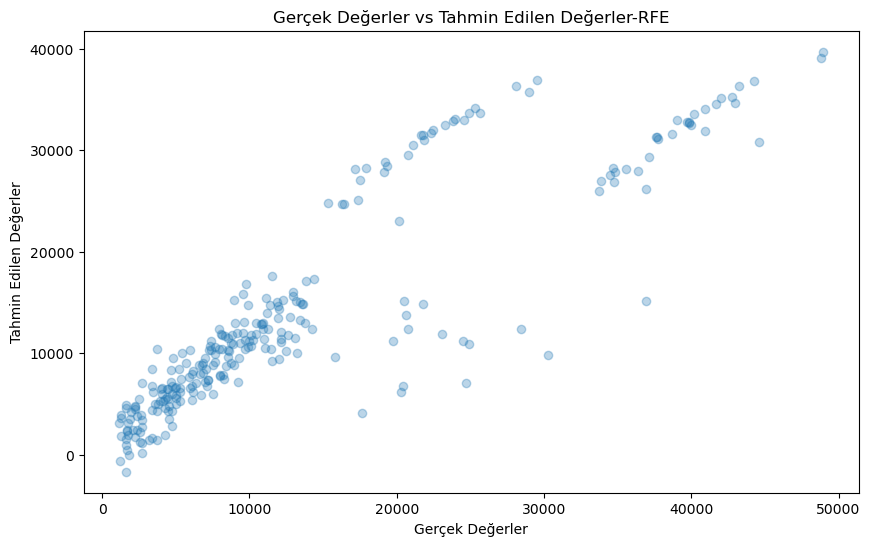

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


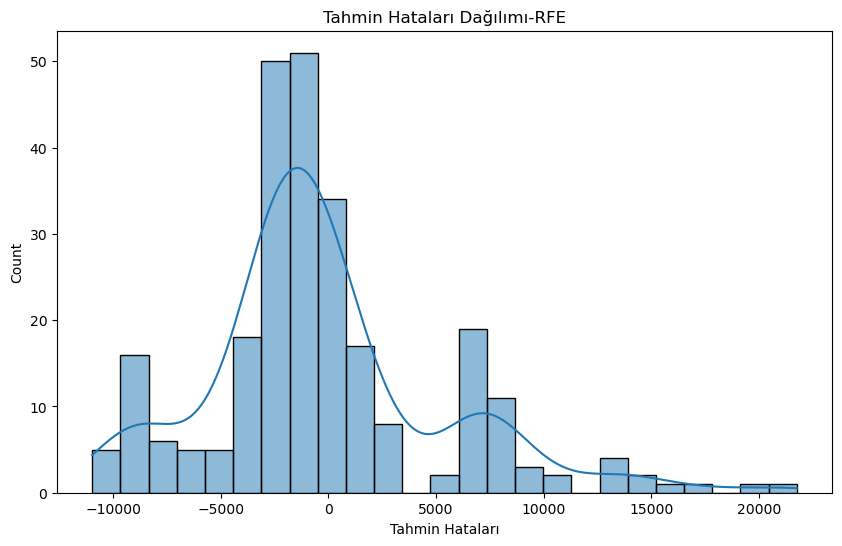

In [5]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred2 = model2.predict(X_train2)

# Test verileri üzerinde tahmin yapın
y_test_pred2 = model2.predict(X_test2)

train_mse = mean_squared_error(y_train2, y_train_pred2)
train_r2 = r2_score(y_train2, y_train_pred2)
train_mae = mean_absolute_error(y_train2, y_train_pred2)
train_rmse = np.sqrt(train_mse)

print('RFE')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test2, y_test_pred2)
test_r2 = r2_score(y_test2, y_test_pred2)
test_mae = mean_absolute_error(y_test2, y_test_pred2)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-RFE')
plt.show()

residuals = y_test2 - y_test_pred2
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-RFE')
plt.show()


Anova
Eğitim Verileri - R-squared: 0.9981870351443546
Eğitim Verileri - Mean Absolute Error: 30.22215033428844
Eğitim Verileri - Root Mean Squared Error: 499.60473697545393
Test Verileri - R-squared: 0.7439451941211381
Test Verileri - Mean Absolute Error: 2656.832058206107
Test Verileri - Root Mean Squared Error: 5935.590511648579


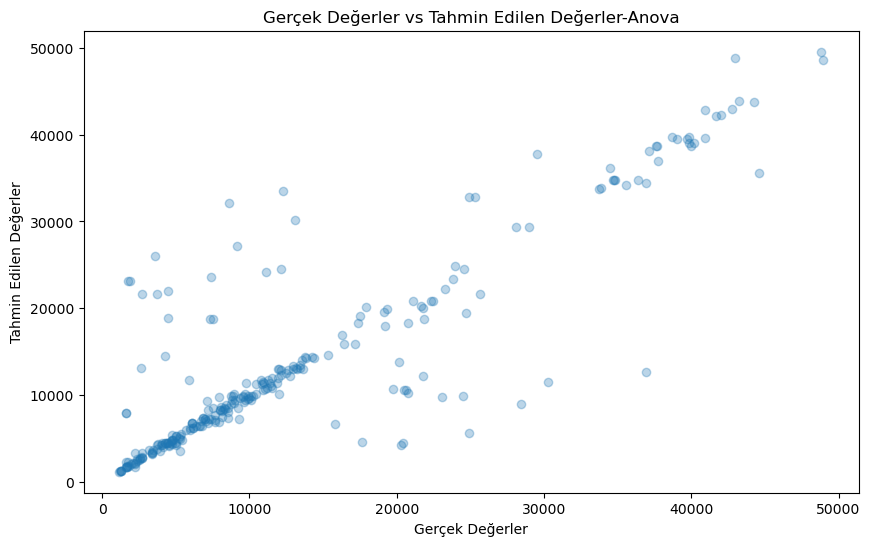

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


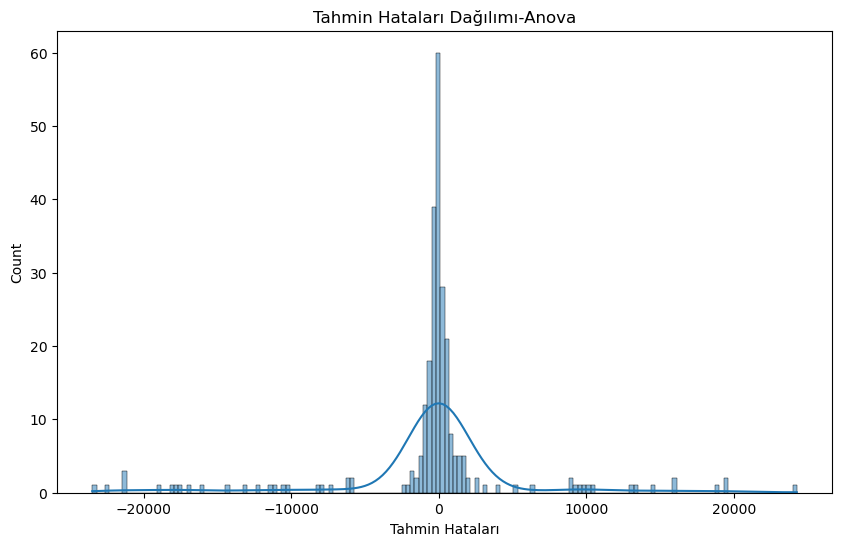

In [6]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred = model.predict(X_train)

# Test verileri üzerinde tahmin yapın
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print('Anova')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Anova')
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Anova')
plt.show()

Corelation
Eğitim Verileri - R-squared: 0.998184528432314
Eğitim Verileri - Mean Absolute Error: 31.43705004775549
Eğitim Verileri - Root Mean Squared Error: 499.95000914284657
Test Verileri - R-squared: 0.7826029041519033
Test Verileri - Mean Absolute Error: 2518.154565744275
Test Verileri - Root Mean Squared Error: 5469.2066759688905


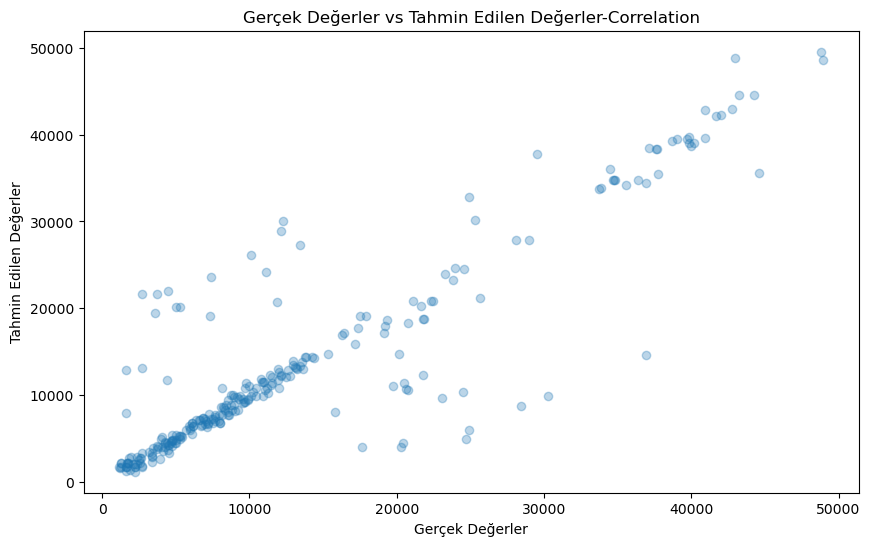

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


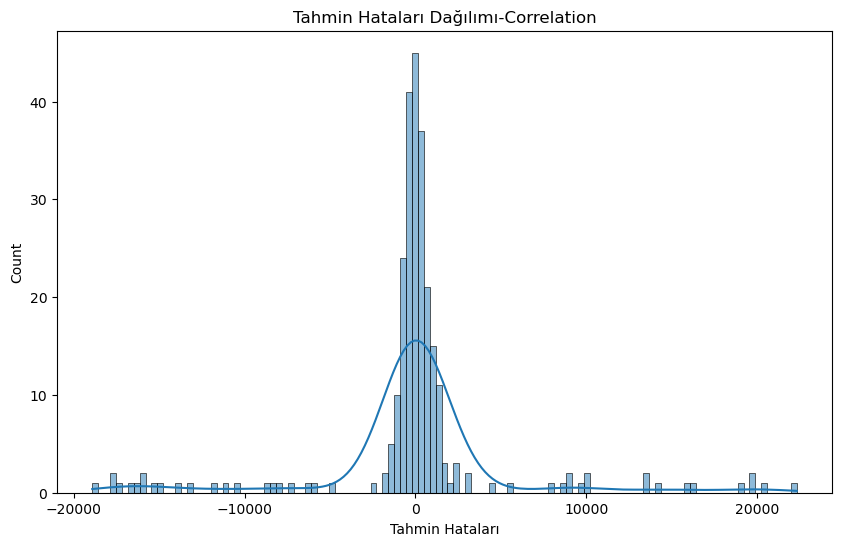

In [7]:
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train1, y_train1)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred1 = model1.predict(X_train1)

# Test verileri üzerinde tahmin yapın
y_test_pred1 = model1.predict(X_test1)

train_mse = mean_squared_error(y_train1, y_train_pred1)
train_r2 = r2_score(y_train1, y_train_pred1)
train_mae = mean_absolute_error(y_train1, y_train_pred1)
train_rmse = np.sqrt(train_mse)

print('Corelation')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test1, y_test_pred1)
test_r2 = r2_score(y_test1, y_test_pred1)
test_mae = mean_absolute_error(y_test1, y_test_pred1)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_test_pred1, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Correlation')
plt.show()

residuals = y_test1 - y_test_pred1
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Correlation')
plt.show()


RFE
Eğitim Verileri - R-squared: 0.9981862057189537
Eğitim Verileri - Mean Absolute Error: 30.68919904489016
Eğitim Verileri - Root Mean Squared Error: 499.71900766136025
Test Verileri - R-squared: 0.8113238143744175
Test Verileri - Mean Absolute Error: 2203.4580139503814
Test Verileri - Root Mean Squared Error: 5095.138690145862


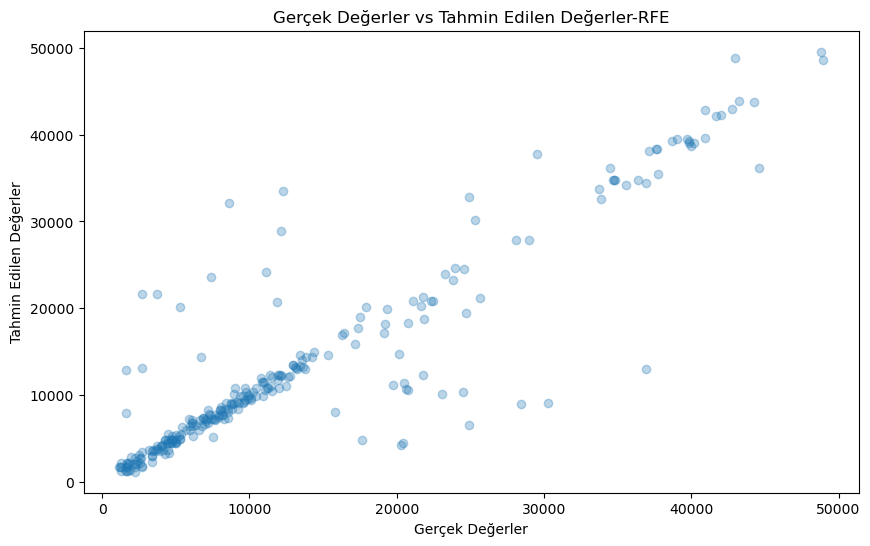

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


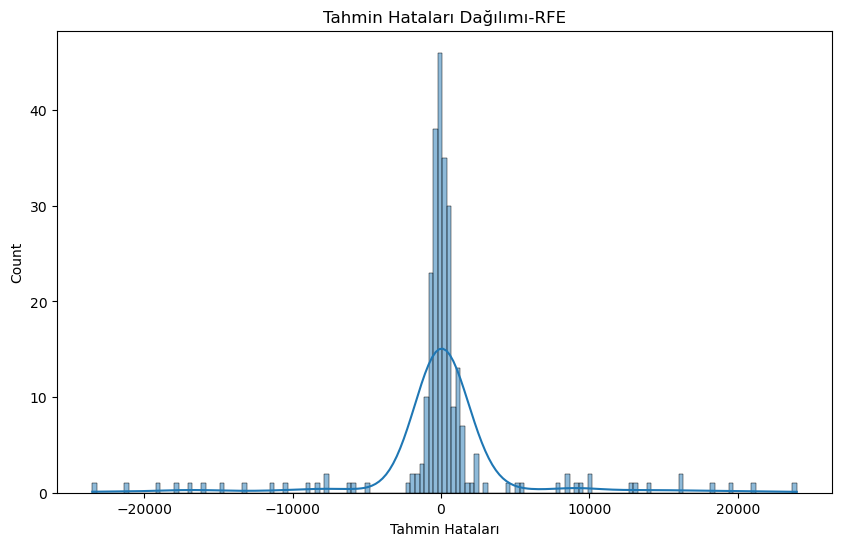

In [8]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train2, y_train2)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred2 = model2.predict(X_train2)

# Test verileri üzerinde tahmin yapın
y_test_pred2 = model2.predict(X_test2)

train_mse = mean_squared_error(y_train2, y_train_pred2)
train_r2 = r2_score(y_train2, y_train_pred2)
train_mae = mean_absolute_error(y_train2, y_train_pred2)
train_rmse = np.sqrt(train_mse)

print('RFE')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test2, y_test_pred2)
test_r2 = r2_score(y_test2, y_test_pred2)
test_mae = mean_absolute_error(y_test2, y_test_pred2)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-RFE')
plt.show()

residuals = y_test2 - y_test_pred2
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-RFE')
plt.show()

Anova
Eğitim Verileri - R-squared: 0.8410033089226193
Eğitim Verileri - Mean Absolute Error: 2868.924950372875
Eğitim Verileri - Root Mean Squared Error: 4678.707529480541
Test Verileri - R-squared: 0.77647739241496
Test Verileri - Mean Absolute Error: 3479.010934724427
Test Verileri - Root Mean Squared Error: 5545.723259351784


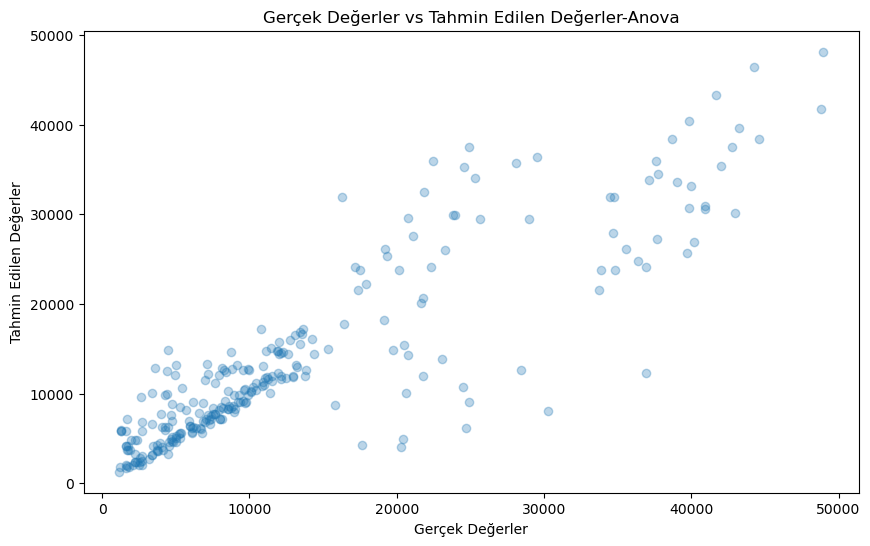

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


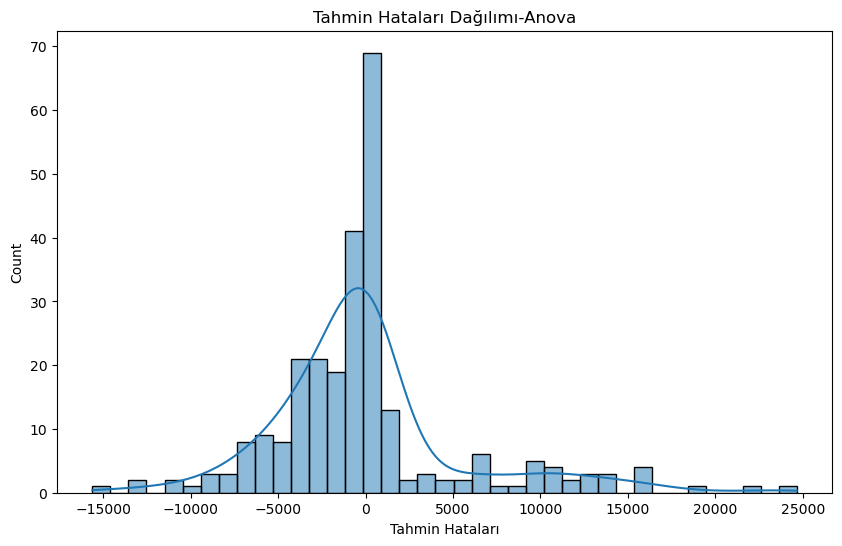

In [9]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred = model.predict(X_train)

# Test verileri üzerinde tahmin yapın
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print('Anova')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Anova')
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Anova')
plt.show()

Corelation
Eğitim Verileri - R-squared: 0.874224783131511
Eğitim Verileri - Mean Absolute Error: 2371.6040724574978
Eğitim Verileri - Root Mean Squared Error: 4161.303504440989
Test Verileri - R-squared: 0.8466495346741868
Test Verileri - Mean Absolute Error: 2645.1067272572514
Test Verileri - Root Mean Squared Error: 4593.460807661656


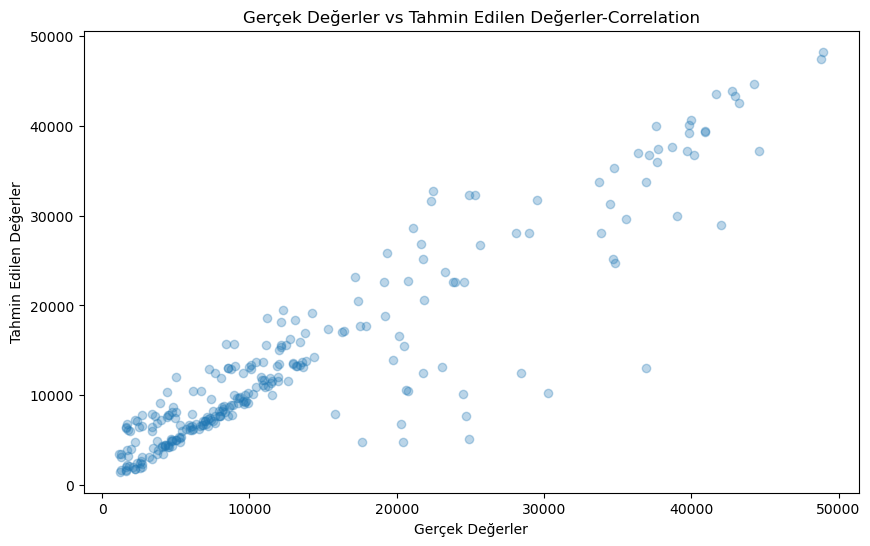

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


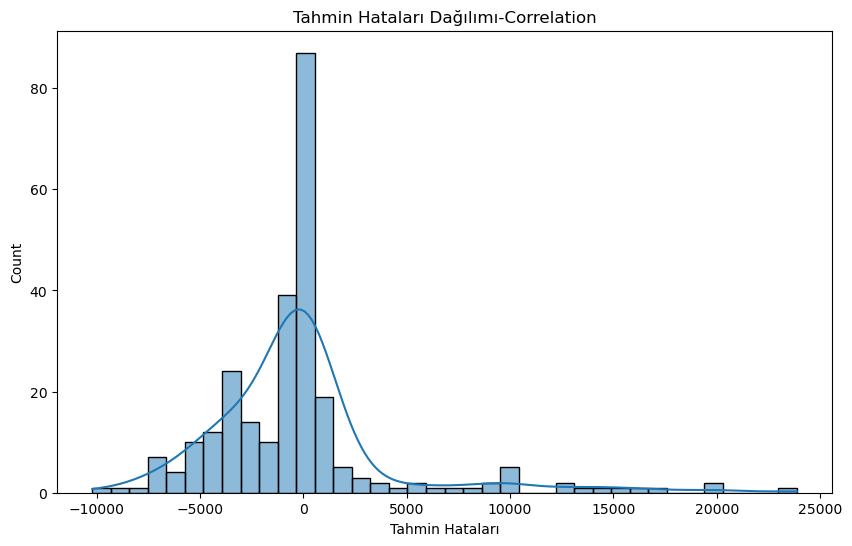

In [10]:
# KNN modelini oluşturun ve eğitin
model1 = KNeighborsRegressor(n_neighbors=5)
model1.fit(X_train1, y_train1)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred1 = model1.predict(X_train1)

# Test verileri üzerinde tahmin yapın
y_test_pred1 = model1.predict(X_test1)

train_mse = mean_squared_error(y_train1, y_train_pred1)
train_r2 = r2_score(y_train1, y_train_pred1)
train_mae = mean_absolute_error(y_train1, y_train_pred1)
train_rmse = np.sqrt(train_mse)

print('Corelation')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test1, y_test_pred1)
test_r2 = r2_score(y_test1, y_test_pred1)
test_mae = mean_absolute_error(y_test1, y_test_pred1)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_test_pred1, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-Correlation')
plt.show()

residuals = y_test1 - y_test_pred1
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-Correlation')
plt.show()

RFE
Eğitim Verileri - R-squared: 0.8671840894378131
Eğitim Verileri - Mean Absolute Error: 2453.0004380523405
Eğitim Verileri - Root Mean Squared Error: 4276.189145705295
Test Verileri - R-squared: 0.8483694919821119
Test Verileri - Mean Absolute Error: 2569.995940808397
Test Verileri - Root Mean Squared Error: 4567.628364111977


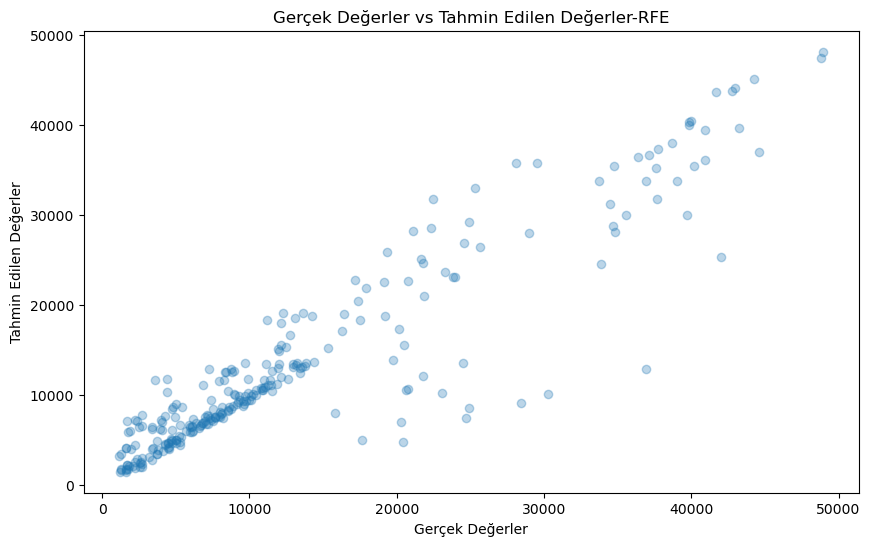

C:\Users\beyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


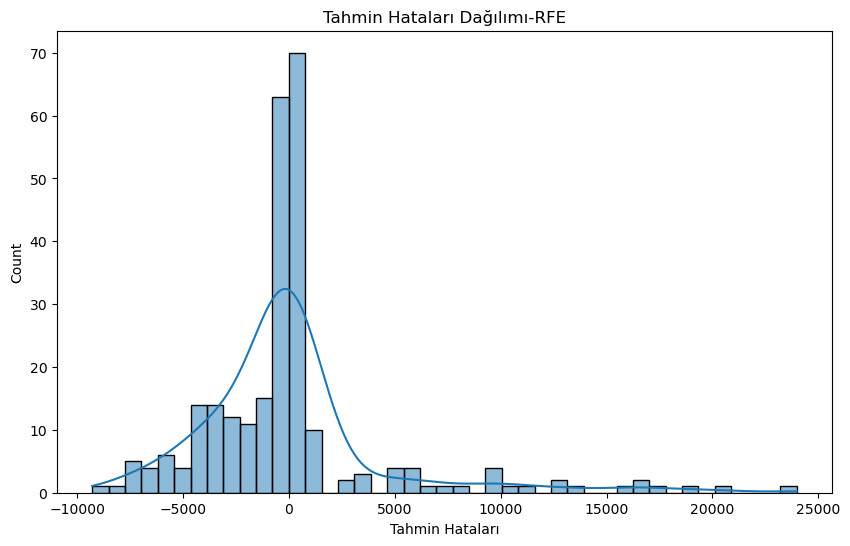

In [11]:
# KNN modelini oluşturun ve eğitin
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train2, y_train2)

# Eğitim verileri üzerinde tahmin yapın
y_train_pred2 = model2.predict(X_train2)

# Test verileri üzerinde tahmin yapın
y_test_pred2 = model2.predict(X_test2)

train_mse = mean_squared_error(y_train2, y_train_pred2)
train_r2 = r2_score(y_train2, y_train_pred2)
train_mae = mean_absolute_error(y_train2, y_train_pred2)
train_rmse = np.sqrt(train_mse)

print('RFE')
print(f'Eğitim Verileri - R-squared: {train_r2}')
print(f'Eğitim Verileri - Mean Absolute Error: {train_mae}')
print(f'Eğitim Verileri - Root Mean Squared Error: {train_rmse}')

# Test verileri için model değerlendirmesi
test_mse = mean_squared_error(y_test2, y_test_pred2)
test_r2 = r2_score(y_test2, y_test_pred2)
test_mae = mean_absolute_error(y_test2, y_test_pred2)
test_rmse = np.sqrt(test_mse)

print(f'Test Verileri - R-squared: {test_r2}')
print(f'Test Verileri - Mean Absolute Error: {test_mae}')
print(f'Test Verileri - Root Mean Squared Error: {test_rmse}')

# Tahmin ve gerçek değerlerin karşılaştırılması için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler-RFE')
plt.show()

residuals = y_test2 - y_test_pred2
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Tahmin Hataları')
plt.title('Tahmin Hataları Dağılımı-RFE')
plt.show()